In [8]:
import numpy as np
import matplotlib.pyplot as plt

import rosbag
from blues.utils import *

## Rowe DVL configuration

- [Commands](http://rowetechinc.co/wiki/index.php?title=ADCP_Commands)
- [Troubleshoot](http://rowetechinc.co/wiki/index.php?title=ADCP_Troubleshoot)

Don't change.

```
DP600 System Configuration:
Mode DVL                            | ---
Sim 0                               | ---
CEPO 3                              | 3: 600 kHz 4 beam 20 degree piston  
CERECORD 0,0                        | 0,0: disable internal recording
CEAUTOSTART 3                       | 5: disable autostart
C232OUT 0                           | 0: disable 232 output
C422OUT 0                           | 0: disable 422 output
CMACOUT 0                           | ---
CUDPOUT 0                           | ---
CBTON[0] 1                          | 1: turn on bottom tracking 
CBTTBP[0] 0.13                      | 0.13s: create a pause between the Water Profile and Bottom Track ping
CBTFILT 0.000,0.000,10,1.000,0      | 0, 0: disable low pass filtering
CBTBL[0] 0.10,10.00                 | 0.1, 10.0: ignore distance for the Bottom Track ping
CBTST[0] 0.900,10.000,10.000        | 0.9: Correlation threshold
                                    | 10.0: Error Velocity threshold
                                    | 10.0: Velocity threshold
CWTON[0] 0                          | 0: disable water profiling
CWSSC 1,1,0,2                       | 1,1,0,2: internal calculation of sound speed (only need salinity input)
CWT 15.00                           | ---: use internal temperature sensor
CTD 0.00                            | ---: use internal pressure sensor
CWSS 1500.00                        | ---: use internal calibration
CHO 0.00,0.00,0.00                  | ---
CHS 1                               | ---
CTS 1                               | ---
CVSF[0] 1.000,1.000                 | ---: velocity scale factor (don't know)
C232B   9600,8,0,1                  | ---
C485B 115200,8,0,1                  | 115100,8,0,1: serial setting
C422B 115200,8,0,1                  | ---
C485G 0.05                          | --- ???
CTRIG 0,-1807677180                 | --- no trigger
COUTTRIG 0                          | ---
```

Could be changed in different environments.

```
CEI 00:00:00.20                     | 5Hz: output rate
C485OUT 5                           | 5: ASCII DVL format output
CWS 35.00                           | Water Salinity (ppt)
CBTMX[0] 20.00                      | 20.0: maximum depth to search for the bottom

CBTBB[0] 4, 4.000, 30.00, 4         | 4: Transmit Pulse Type and Processing
                                    | 4.0: Lag length in vertical meters
                                    | 30.0: Long Range Narrowband Auto Switch Depth
                                    | 4: Beam Multiplex
CBTT[0] 20.0,150.0,20.0,8.0         | 20.0: SNR (dB) Shallow Detection Threshold
                                    | 150.0: Depth(m) Shallow Switch
                                    | 20.0: SNR(dB) Deep Detection Threshold
                                    | 8.0: Depth(m) Deep Switch
```

In [17]:
def plot_nav_data(dvl, depth, vmax=0.5, dmax=10.0):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 8))
    ax1.plot(dvl[:, 0], dvl[:, 1], 'r', label='vx')
    ax1.plot(dvl[:, 0], dvl[:, 2], 'g', label='vy')
    ax1.plot(dvl[:, 0], dvl[:, 3], 'b', label='vz')
    ax1.set_ylim(-vmax, vmax)
    ax1.legend(fontsize='x-large', loc='upper right')
    ax1.grid(axis='y')
    ax1.set_ylabel('m/s')

    ax2.plot(dvl[:, 0], dvl[:, 4], 'k', label='altitude')
    ax2.plot(depth[:, 0], depth[:, 1], 'c', label='depth')
    ax2.set_ylim(depth[:, 1].min(), dmax)
    ax2.legend(fontsize='x-large', loc='upper right') 
    ax2.grid(axis='y')
    ax2.set_ylabel('m')

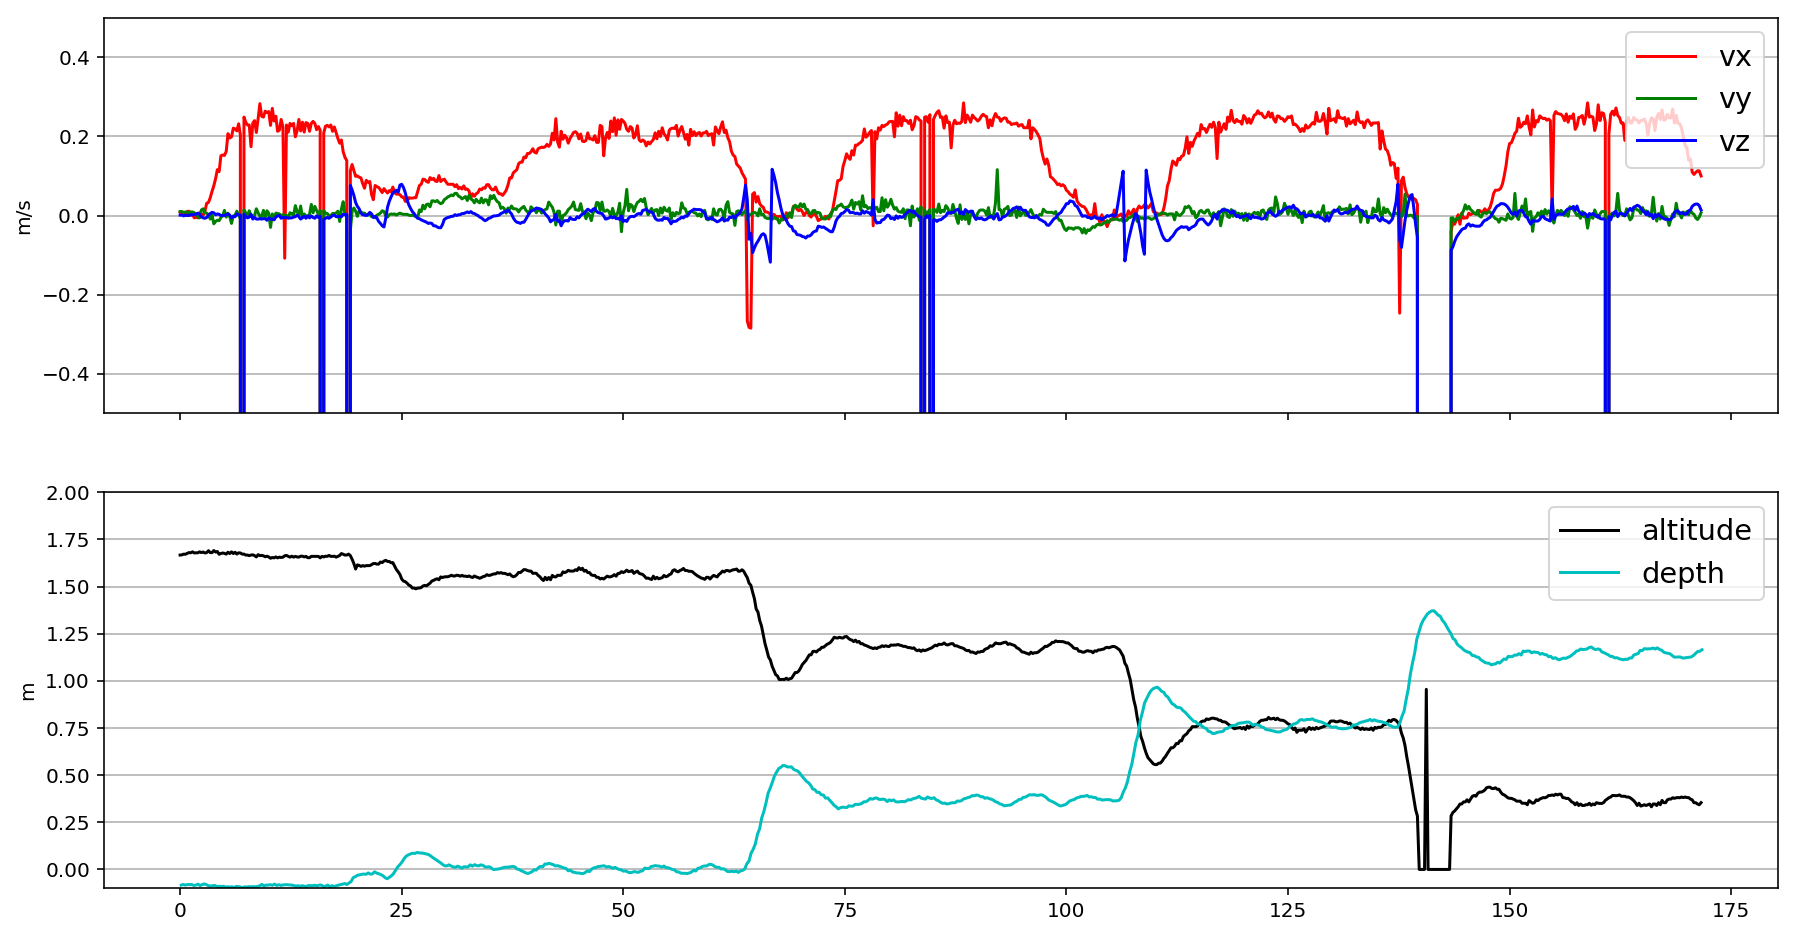

In [18]:
# CBTBB[0]] 4,4.0,30.0,4
# CBTT[0] 20.0,25.0,20.0,2.0
# CBTST[0]] 0.9,10.0,10.0
dvl, depth, imu = load_nav_data('../data/tank_dvl/2019-06-17-10-34-55.bag', progress=False)
plot_nav_data(dvl, depth, dmax=2)

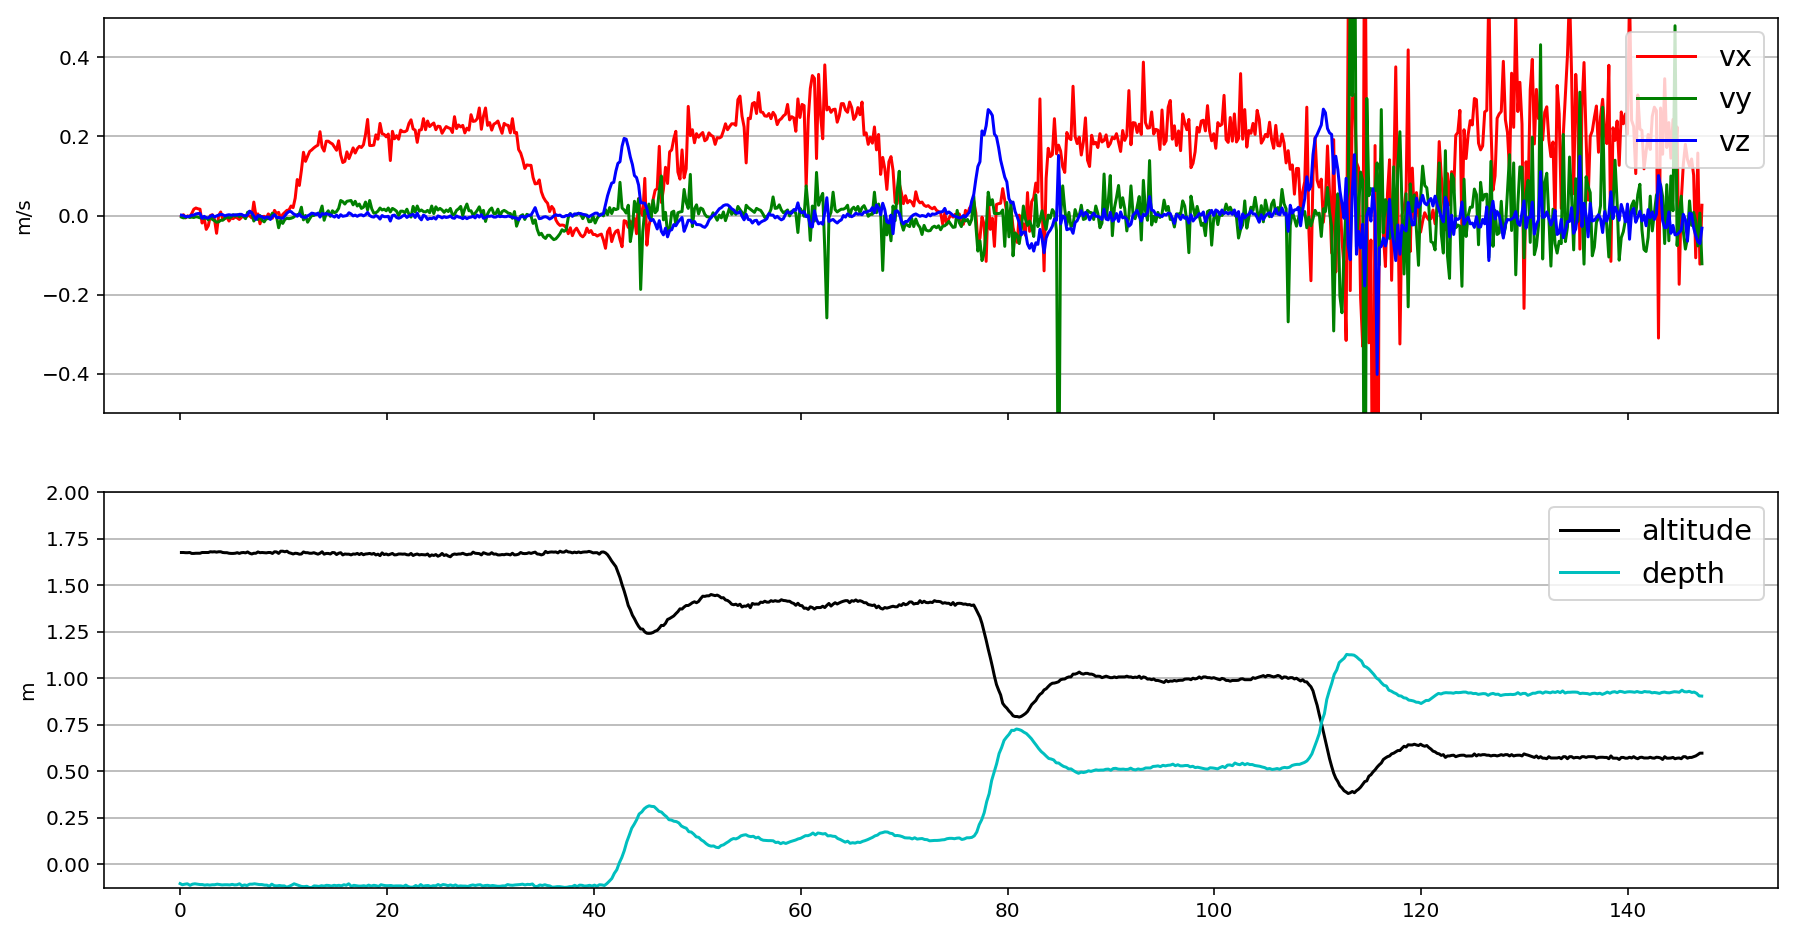

In [20]:
# CBTBB[0]] 1,4.0,30.0,4
# CBTT[0] 20.0,25.0,20.0,2.0
# CBTST[0]] 0.9,10.0,10.0
dvl, depth, imu = load_nav_data('../data/tank_dvl/2019-06-17-10-44-18.bag', progress=False)
plot_nav_data(dvl, depth, dmax=2)

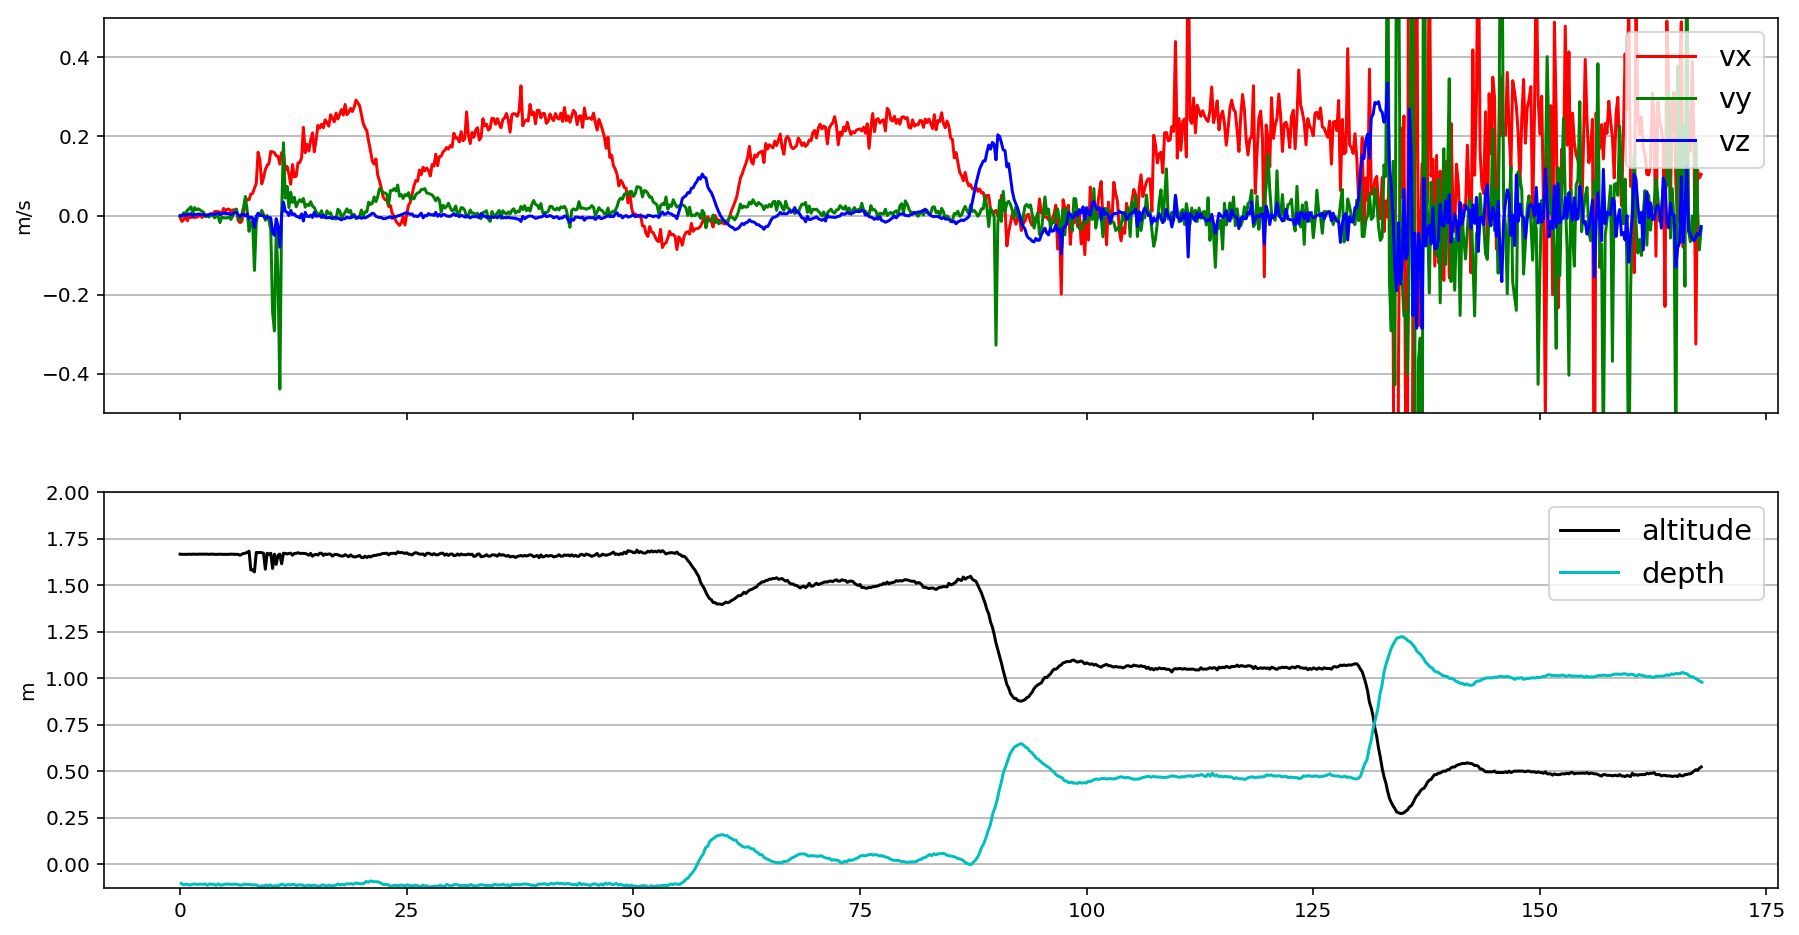

In [22]:
# CBTBB[0]] 1,1.0,30.0,4
# CBTT[0] 20.0,25.0,20.0,2.0
# CBTST[0]] 0.9,10.0,10.0
dvl, depth, imu = load_nav_data('../data/tank_dvl/2019-06-17-10-56-00.bag', progress=False)
plot_nav_data(dvl, depth, dmax=2)

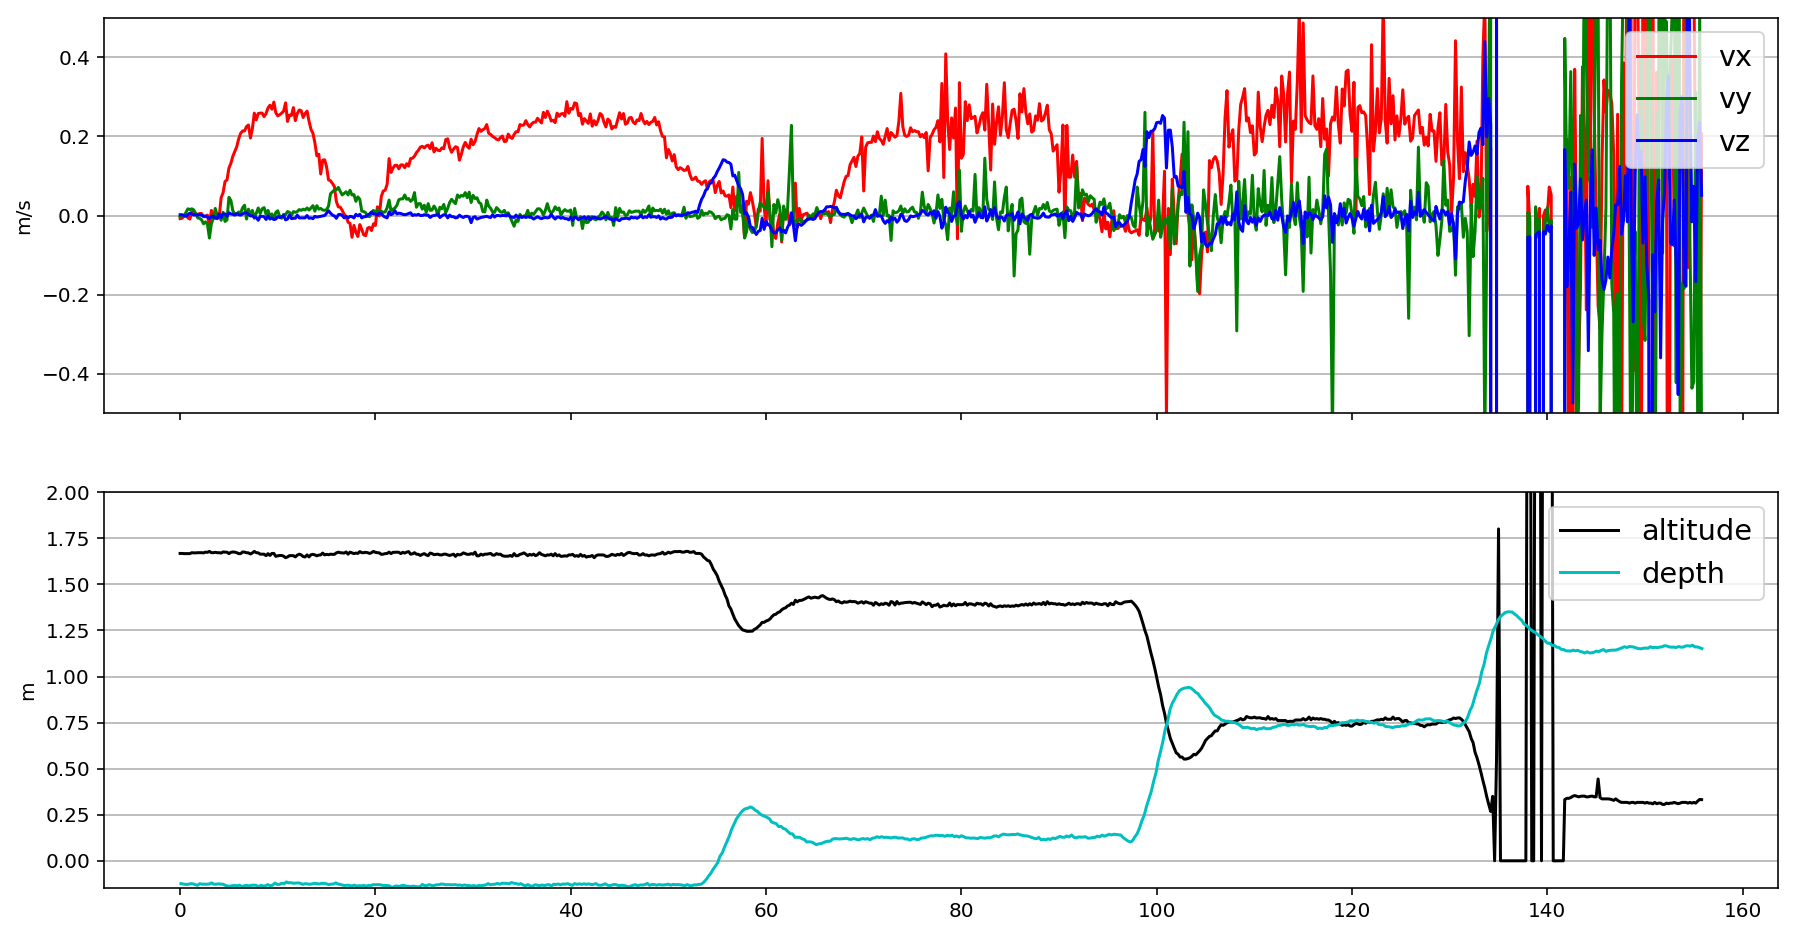

In [23]:
# CBTBB[0]] 1,0.5,30.0,4
# CBTT[0] 20.0,25.0,20.0,2.0
# CBTST[0]] 0.9,10.0,10.0
dvl, depth, imu = load_nav_data('../data/tank_dvl/2019-06-17-11-02-57.bag', progress=False)
plot_nav_data(dvl, depth, dmax=2)

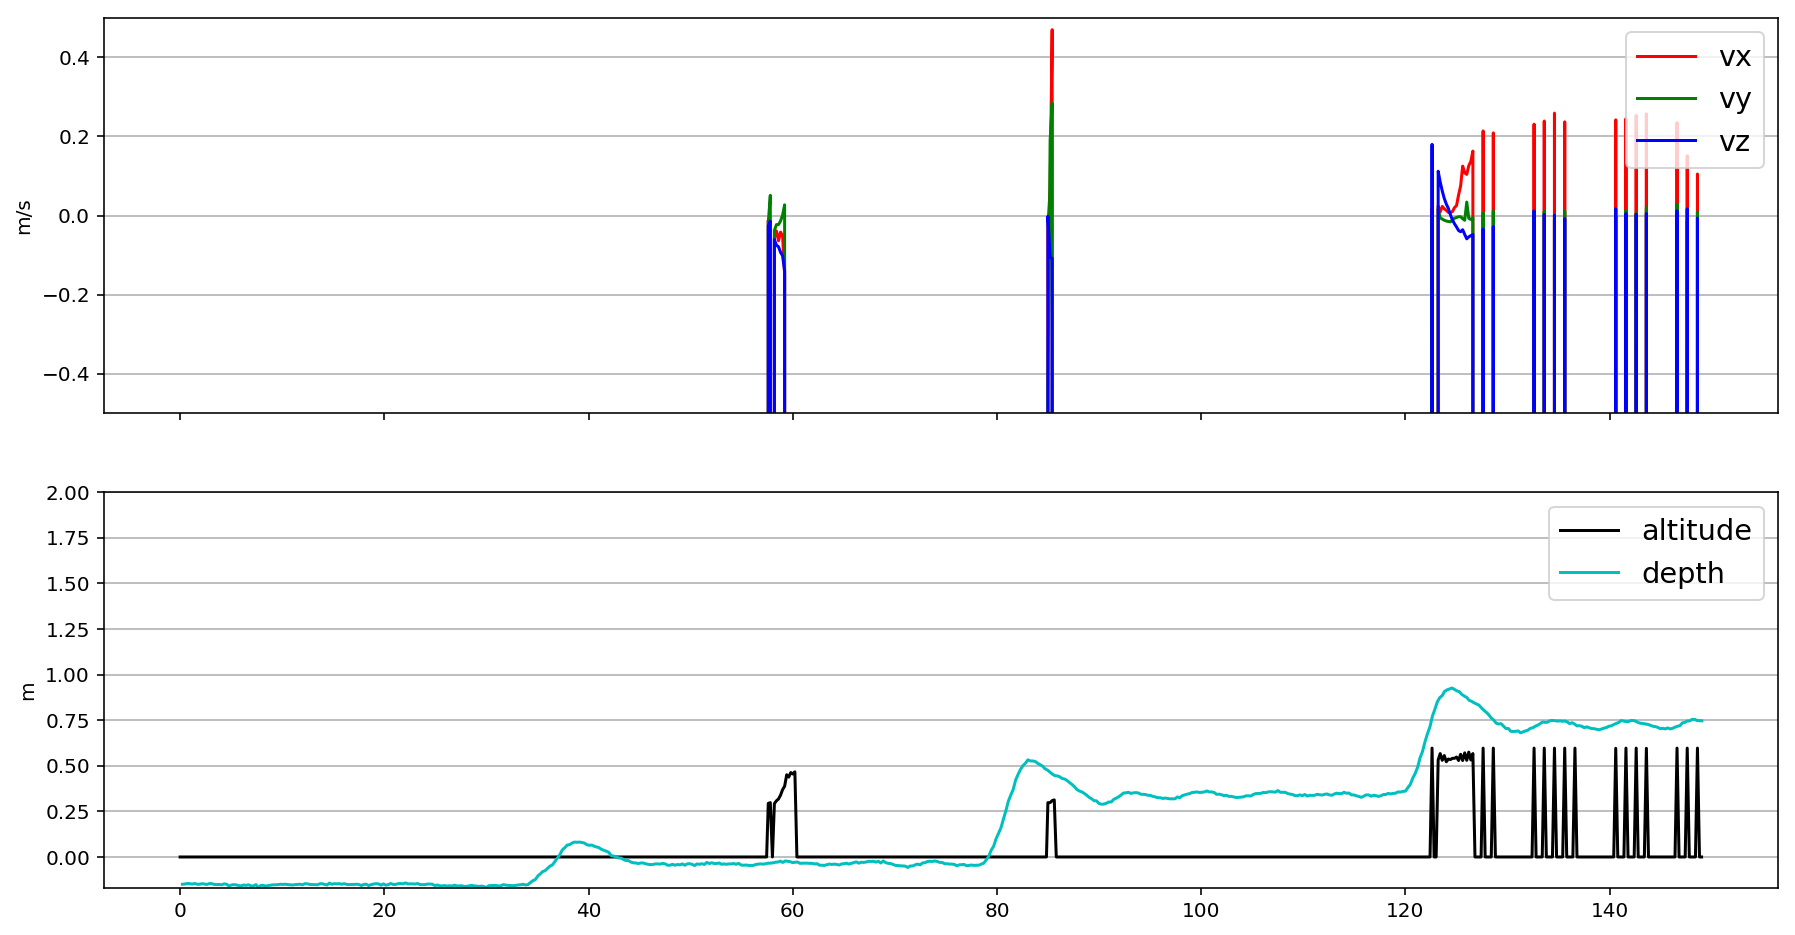

In [24]:
# CBTBB[0]] 4,1.0,30.0,4
# CBTT[0] 20.0,25.0,20.0,2.0
# CBTST[0]] 0.9,10.0,10.0
dvl, depth, imu = load_nav_data('../data/tank_dvl/2019-06-17-11-08-04.bag', progress=False)
plot_nav_data(dvl, depth, dmax=2)

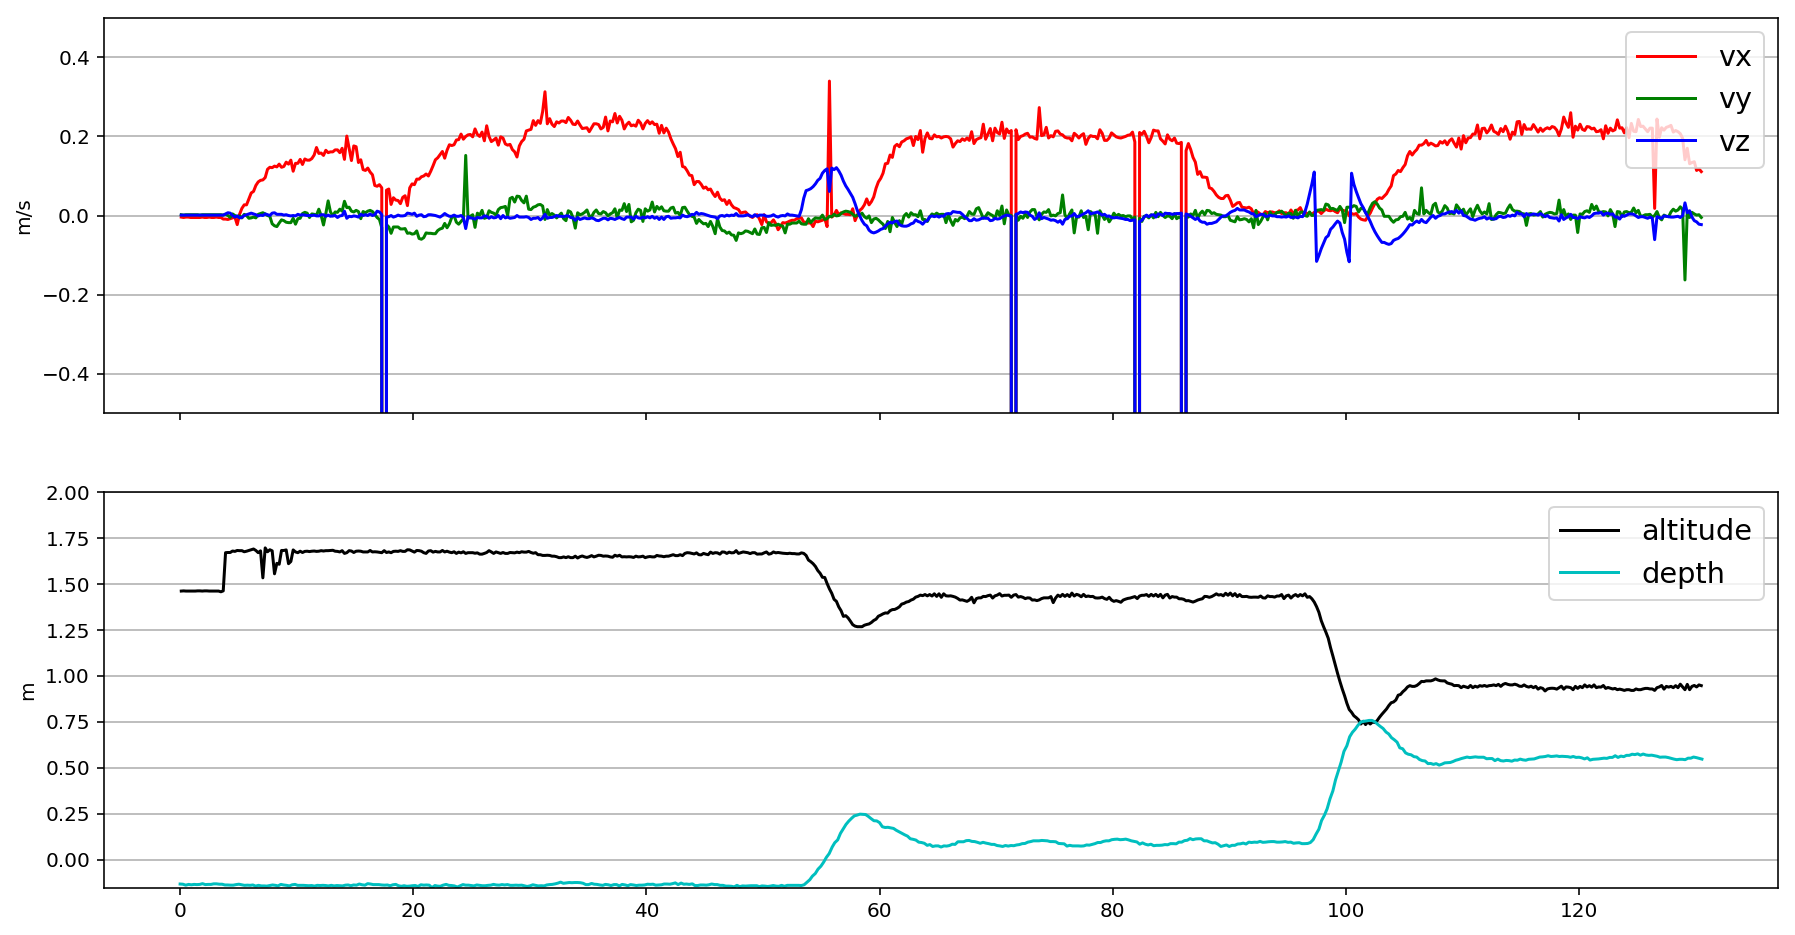

In [25]:
# CBTBB[0]] 4,4.0,30.0,4
# CBTT[0] 20.0,150.0,20.0,8.0
# CBTST[0]] 0.9,10.0,10.0
dvl, depth, imu = load_nav_data('../data/tank_dvl/2019-06-17-11-20-06.bag', progress=False)
plot_nav_data(dvl, depth, dmax=2)

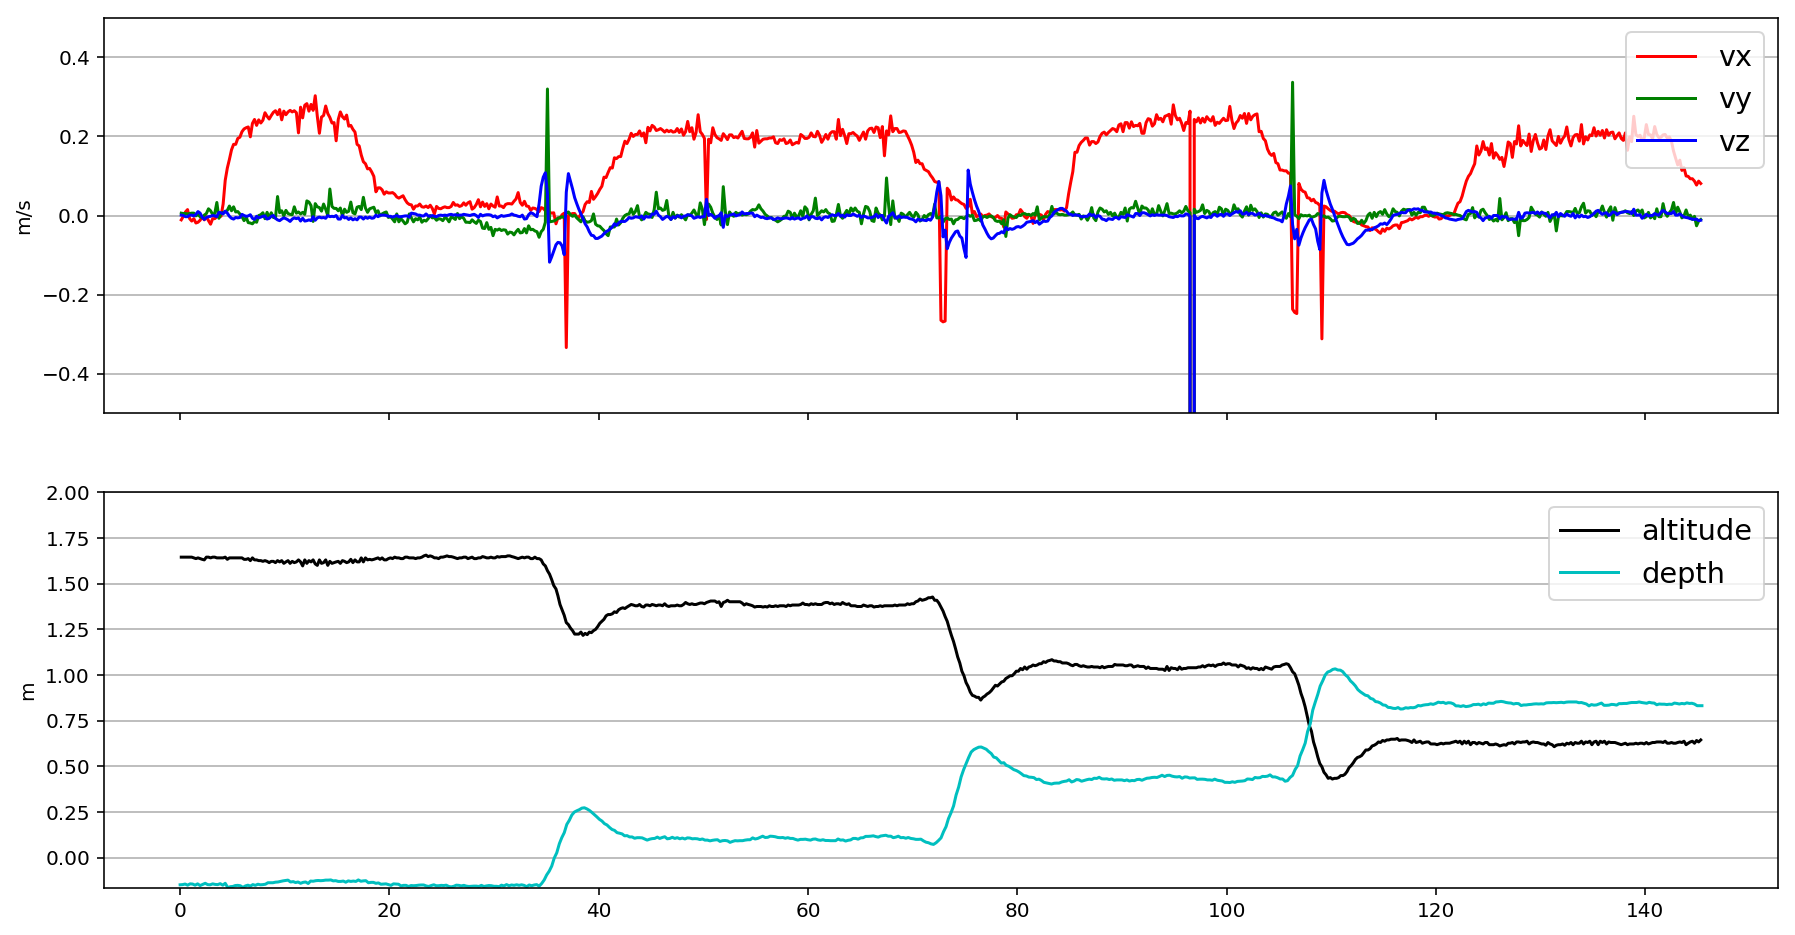

In [26]:
# CBTBB[0]] 4,4.0,30.0,4
# CBTT[0] 20.0,150.0,20.0,8.0
# CBTST[0]] 0.9,1.0,1.0
dvl, depth, imu = load_nav_data('../data/tank_dvl/2019-06-17-12-50-34.bag', progress=False)
plot_nav_data(dvl, depth, dmax=2)

## Causes of erroneous measurements

**Is there an angular rate limit for the accuracy spec?** (p53 [Telodyne Manual])

The effect of increased angular motion is to increase the standard deviation of each individual ping rather than effecting long term accuracy. Our broadband systems have extremely good performance on single ping precision due to our patented broadband processing and therefore this is not typically a concern.

In addition to the above, you should note that considerable levels of roll or pitch (>20 degrees) may result in the decorrelation of some pings. As we use narrow acoustic beams to achieve the highest possible accuracy, the transmitted signal may not be received back at the transducer if the angular motion is high (roll or pitch rate) combined with high roll / pitch angles. This effectively would reduce the number of bottom tracking pings that would be reported from the DVL. We use the BC command to set a correlation threshold in our DVL. We set a default (recommended by TRDI), however this threshold may be overridden (reduced) if you expect increased motion (see BC - Correlation Magnitude Minimum).

**Interference** (p32 [Telodyne Manual])

Interference from other acoustic devices can cause velocity and direction bias. In extreme cases it can prevent the DVL from operating. However, it is possible to avoid interference. From our experience, if the other device operating frequency is within 25% of the operating frequency of the DVL or is an odd multiple of the DVL center frequency (e.g. DVL is 307,200Hz, than a third harmonic (multiple) of another device would be 100,000Hz) you may want to prevent both devices from transmitting at the same time (see FSA-018 - Triggering a DVL with a TTL Signal)

## Bottom tracking

DVL works in two steps,
Step 1: Detect the bottom.
Step 2: Estimate the relative velocity to the bottom by measuring the Doppler shift.

<img src="https://i.imgur.com/krHST0e.png" width="50%"/>

Typical causes for loss of “bottom lock”,

- Soft bottom
- Close to bottom
- Bottom slope / underwater structure
- Long range

Statistical measure of velocity precision for each beam from [Nortek](https://www.ths.org.uk/documents/ths.org.uk/downloads/presentation_8_mmf60_-_nortek_-_dvl_improvements_(compressed).pdf)

## SLAM issues

**What is the timing relationship between the DVL internal clock and the time of the Doppler bottom tracking measurement?** (p46 [Telodyne Manual])

After time tag = (1/ C Cos J) ms/meter x (Altitude meters + min (0.3 x Altitude meters, 0.015 x BX command in decimeters)).

**DVL accuracy** (p50 [Telodyne Manual])

There are two parameters stated for velocity.
- Precision: random white noise, e.g., standard deviation at 1.0 m/s: ±0.3cm/s
- Accuracy: repeatable bias partially correctable by calibration and/or by Kalman filtering.

The Precision figure is a statement of random error that partially or entirely averages out over longer periods. Random errors are due to the random white noise(i.e. independent of previous measurement) on the velocity data measurement.The Accuracy figure is a statement of repeatable error/noise non-reducible by averaging. It can be interpreted as consisting of two independently varying components: A static bias drift (i.e. ±b) and a scale factor of the measured variable (i.e. ±s%). The maximum error can therefore be expressed as the RMS combination of the two components.

Positional error, therefore, is the total RMS of the accuracy long term velocity accuracy multiplied by time.
Position Error = RMS (DVL Dynamic Bias x Travel Time, DVL Static Bias x Travel Time).
Here is a simple example with a 300KHz DVL:

```
DVL Accuracy = DVL Dynamic Bias + DVL Static Bias
Static Bias on velocity = measured at zero speed, the velocity static bias drift is ±2 mm/s,
Dynamic Bias on velocity = ± 0.4% of DVL velocity,
Velocity = 1 m/s,
Travel Time = 1 hr
Position Error = ±0.4% x 1 m/s x 3600 s + ±2 mm/s x 3600 s
So, after one hour,
Distance Traveled = 3.6 km
Position Error = ±14.4 m + ±7.2m = ±11.4m (???)
```

**Velocity model**

- [Tightly Integrated Doppler Velocity Log
Aided Inertial Navigational System](https://pdfs.semanticscholar.org/2182/be2a6de545e66fdff3bd173d1710af037886.pdf)
- [Autonomous Underwater Vehicle Navigation](https://apps.dtic.mil/dtic/tr/fulltext/u2/a486030.pdf)

[Telodyne Manual]: http://www.teledynemarine.com/Documents/Brand%20Support/RD%20INSTRUMENTS/Technical%20Resources/Manuals%20and%20Guides/WorkHorse%20Navigator/Navigator%20Technical%20Manual_Dec17.pdf